In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import os
import re
import time
from collections import Counter
from string import punctuation
import string
import nltk
from nltk.corpus import stopwords, words
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [ ]:
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Data Loading

In [6]:
df = pd.read_csv("/content/BA_AirlineReviews.csv")

In [7]:
df.head()

Unnamed: 0  OverallRating                              ReviewHeader  \
0           0            1.0    "Service level far worse then Ryanair"   
1           1            3.0  "do not upgrade members based on status"   
2           2            8.0             "Flight was smooth and quick"   
3           3            1.0             "Absolutely hopeless airline"   
4           4            1.0        "Customer Service is non existent"   

               Name            Datetime  VerifiedReview  \
0           L Keele  19th November 2023            True   
1      Austin Jones  19th November 2023            True   
2        M A Collie  16th November 2023           False   
3        Nigel Dean  16th November 2023            True   
4  Gaylynne Simpson  14th November 2023           False   

                                          ReviewBody TypeOfTraveller  \
0  4 Hours before takeoff we received a Mail stat...  Couple Leisure   
1  I recently had a delay on British Airways from...        Business   
2  Boarded on time, but it took ages to get to th...  Couple Leisure   
3  5 days before the flight, we were advised by B...  Couple Leisure   
4  We traveled to Lisbon for our dream vacation, ...  Couple Leisure   

         SeatType                      Route      DateFlown  SeatComfort  \
0   Economy Class        London to Stuttgart  November 2023          1.0   
1   Economy Class         Brussels to London  November 2023          2.0   
2  Business Class  London Heathrow to Dublin  November 2023          3.0   
3   Economy Class           London to Dublin  December 2022          3.0   
4   Economy Class           London to Lisbon  November 2023          1.0   

   CabinStaffService  GroundService  ValueForMoney Recommended Aircraft  \
0                1.0            1.0            1.0          no      NaN   
1                3.0            1.0            2.0          no     A320   
2                3.0            4.0            3.0         yes     A320   
3                3.0            1.0            1.0          no      NaN   
4                1.0            1.0            1.0          no      NaN   

   Food&Beverages  InflightEntertainment  Wifi&Connectivity  
0             NaN                    NaN                NaN  
1             1.0                    2.0                2.0  
2             4.0                    NaN                NaN  
3             NaN                    NaN                NaN  
4             1.0                    1.0                1.0

In [8]:
df.shape

(3701, 20)

EDA & Pre-processing

In [ ]:
df.head()

Unnamed: 0  OverallRating                              ReviewHeader  \
0           0            1.0    "Service level far worse then Ryanair"   
1           1            3.0  "do not upgrade members based on status"   
2           2            8.0             "Flight was smooth and quick"   
3           3            1.0             "Absolutely hopeless airline"   
4           4            1.0        "Customer Service is non existent"   

               Name            Datetime  VerifiedReview  \
0           L Keele  19th November 2023            True   
1      Austin Jones  19th November 2023            True   
2        M A Collie  16th November 2023           False   
3        Nigel Dean  16th November 2023            True   
4  Gaylynne Simpson  14th November 2023           False   

                                          ReviewBody TypeOfTraveller  \
0  4 Hours before takeoff we received a Mail stat...  Couple Leisure   
1  I recently had a delay on British Airways from...        Business   
2  Boarded on time, but it took ages to get to th...  Couple Leisure   
3  5 days before the flight, we were advised by B...  Couple Leisure   
4  We traveled to Lisbon for our dream vacation, ...  Couple Leisure   

         SeatType                      Route      DateFlown  SeatComfort  \
0   Economy Class        London to Stuttgart  November 2023          1.0   
1   Economy Class         Brussels to London  November 2023          2.0   
2  Business Class  London Heathrow to Dublin  November 2023          3.0   
3   Economy Class           London to Dublin  December 2022          3.0   
4   Economy Class           London to Lisbon  November 2023          1.0   

   CabinStaffService  GroundService  ValueForMoney Recommended Aircraft  \
0                1.0            1.0            1.0          no      NaN   
1                3.0            1.0            2.0          no     A320   
2                3.0            4.0            3.0         yes     A320   
3                3.0            1.0            1.0          no      NaN   
4                1.0            1.0            1.0          no      NaN   

   Food&Beverages  InflightEntertainment  Wifi&Connectivity  
0             NaN                    NaN                NaN  
1             1.0                    2.0                2.0  
2             4.0                    NaN                NaN  
3             NaN                    NaN                NaN  
4             1.0                    1.0                1.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3701 non-null   int64  
 1   OverallRating          3696 non-null   float64
 2   ReviewHeader           3701 non-null   object 
 3   Name                   3701 non-null   object 
 4   Datetime               3701 non-null   object 
 5   VerifiedReview         3701 non-null   bool   
 6   ReviewBody             3701 non-null   object 
 7   TypeOfTraveller        2930 non-null   object 
 8   SeatType               3699 non-null   object 
 9   Route                  2926 non-null   object 
 10  DateFlown              2923 non-null   object 
 11  SeatComfort            3585 non-null   float64
 12  CabinStaffService      3574 non-null   float64
 13  GroundService          2855 non-null   float64
 14  ValueForMoney          3700 non-null   float64
 15  Reco

In [10]:
# Selecting only the required columns
required_columns = ['ReviewHeader', 'ReviewBody', 'OverallRating']
df = df[required_columns].copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ReviewHeader   3701 non-null   object 
 1   ReviewBody     3701 non-null   object 
 2   OverallRating  3696 non-null   float64
dtypes: float64(1), object(2)
memory usage: 86.9+ KB


In [12]:
df.head()

ReviewHeader  \
0    "Service level far worse then Ryanair"   
1  "do not upgrade members based on status"   
2             "Flight was smooth and quick"   
3             "Absolutely hopeless airline"   
4        "Customer Service is non existent"   

                                          ReviewBody  OverallRating  
0  4 Hours before takeoff we received a Mail stat...            1.0  
1  I recently had a delay on British Airways from...            3.0  
2  Boarded on time, but it took ages to get to th...            8.0  
3  5 days before the flight, we were advised by B...            1.0  
4  We traveled to Lisbon for our dream vacation, ...            1.0

In [13]:
df.isnull().sum()

ReviewHeader     0
ReviewBody       0
OverallRating    5
dtype: int64

In [14]:
df.dropna(subset=['OverallRating'])

ReviewHeader  \
0       "Service level far worse then Ryanair"   
1     "do not upgrade members based on status"   
2                "Flight was smooth and quick"   
3                "Absolutely hopeless airline"   
4           "Customer Service is non existent"   
...                                        ...   
3696           British Airways customer review   
3697           British Airways customer review   
3698           British Airways customer review   
3699           British Airways customer review   
3700           British Airways customer review   

                                             ReviewBody  OverallRating  
0     4 Hours before takeoff we received a Mail stat...            1.0  
1     I recently had a delay on British Airways from...            3.0  
2     Boarded on time, but it took ages to get to th...            8.0  
3     5 days before the flight, we were advised by B...            1.0  
4     We traveled to Lisbon for our dream vacation, ...            1.0  
...                                                 ...            ...  
3696  This was a bmi Regional operated flight on a R...            1.0  
3697  LHR to HAM. Purser addresses all club passenge...            9.0  
3698  My son who had worked for British Airways urge...            5.0  
3699  London City-New York JFK via Shannon on A318 b...            4.0  
3700  SIN-LHR BA12 B747-436 First Class. Old aircraf...            4.0  

[3696 rows x 3 columns]

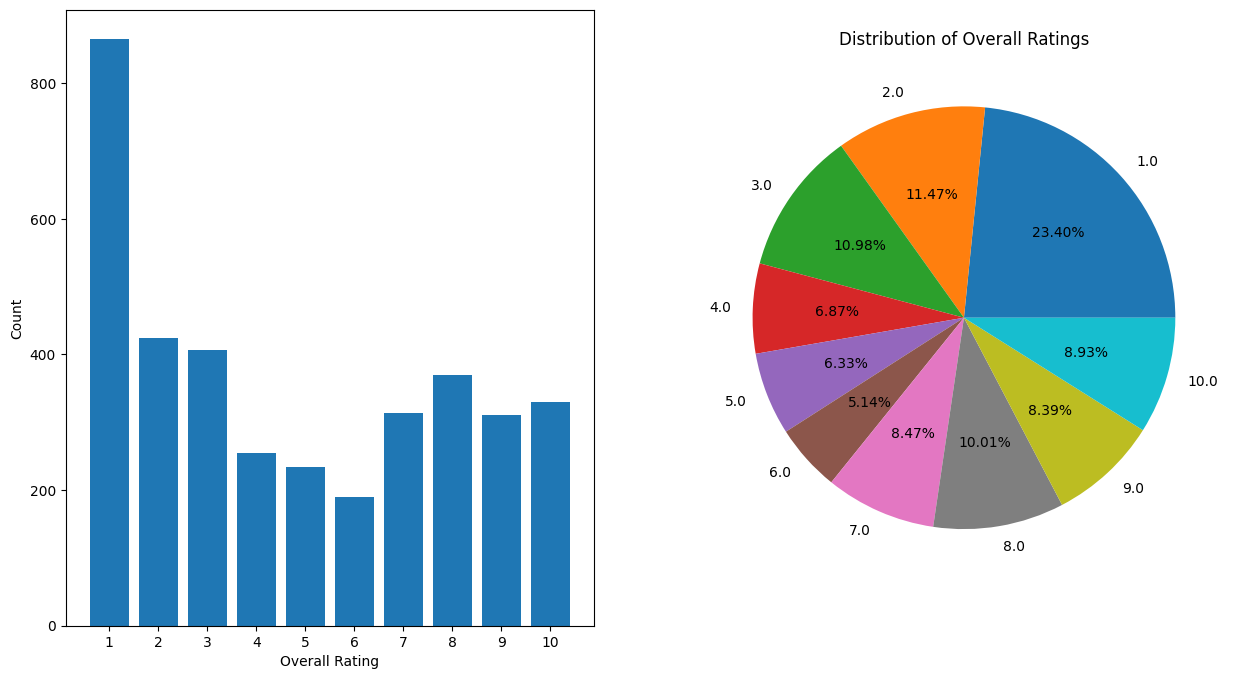

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Left subplot - Bar Plot
labels = df['OverallRating'].value_counts().sort_index().index
values = df['OverallRating'].value_counts().sort_index()
axes[0].bar(labels, values)
axes[0].set_xticks(range(1, 11))
axes[0].set_xlabel('Overall Rating')
axes[0].set_ylabel('Count')

# Right subplot - Pie Chart
axes[1].pie(values, labels=labels, autopct='%1.2f%%')
axes[1].set_title('Distribution of Overall Ratings')

plt.show()

In [16]:
# Previwing the header column
df['ReviewHeader'].head()

0      "Service level far worse then Ryanair"
1    "do not upgrade members based on status"
2               "Flight was smooth and quick"
3               "Absolutely hopeless airline"
4          "Customer Service is non existent"
Name: ReviewHeader, dtype: object

In [17]:
 # Revoming quotation marks in Review header, start and end
df['ReviewHeader'] = df['ReviewHeader'].str.strip('"')

In [18]:
# Then Merging the review header and body to get more relevency
df['ReviewText'] = df['ReviewHeader'] + ' ' + df['ReviewBody']
df.head()


ReviewHeader  \
0    Service level far worse then Ryanair   
1  do not upgrade members based on status   
2             Flight was smooth and quick   
3             Absolutely hopeless airline   
4        Customer Service is non existent   

                                          ReviewBody  OverallRating  \
0  4 Hours before takeoff we received a Mail stat...            1.0   
1  I recently had a delay on British Airways from...            3.0   
2  Boarded on time, but it took ages to get to th...            8.0   
3  5 days before the flight, we were advised by B...            1.0   
4  We traveled to Lisbon for our dream vacation, ...            1.0   

                                          ReviewText  
0  Service level far worse then Ryanair 4 Hours b...  
1  do not upgrade members based on status I recen...  
2  Flight was smooth and quick Boarded on time, b...  
3  Absolutely hopeless airline 5 days before the ...  
4  Customer Service is non existent We traveled t...

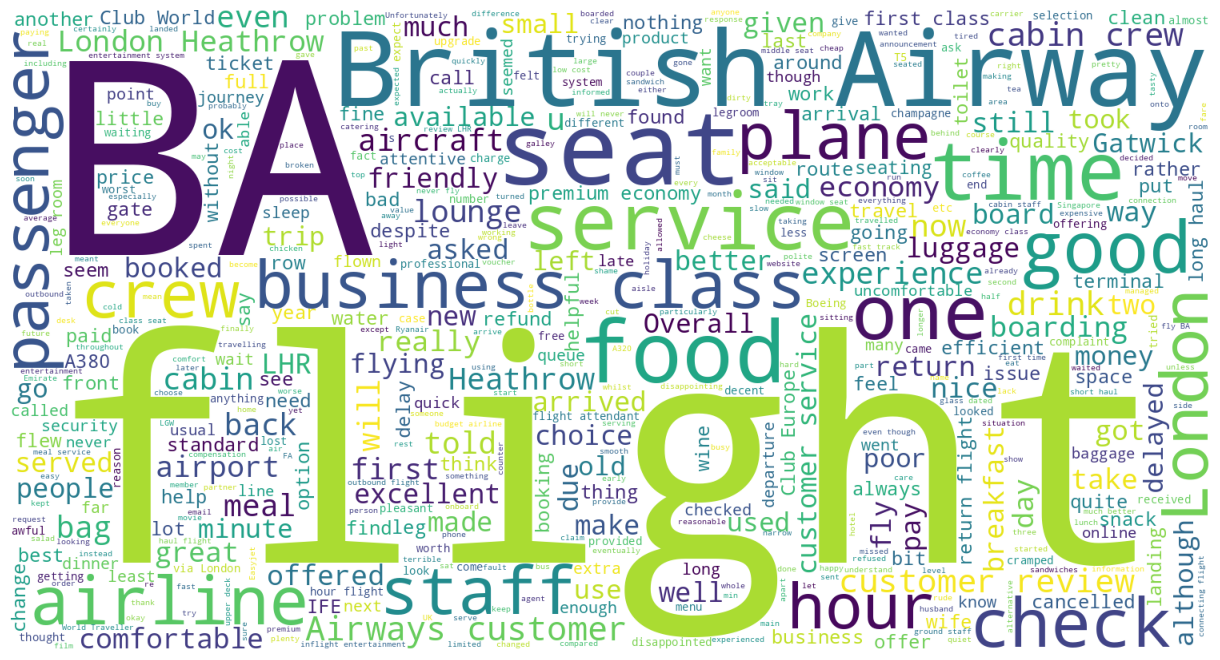

In [19]:
# Plotting the word cloud of all most frequent words from the reviews

# join all the text data into a single string
text = " ".join(df['ReviewText'])

# generate the word cloud
wordcloud = WordCloud(max_words=500, height= 800, width = 1500, background_color='white').generate(text)

# display the word cloud
plt.figure(figsize=(12, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Data Cleaning

In [20]:
import spacy
!python -m spacy download en_core_web_sm
# Load the Spacy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
# Define stopwords and custom stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords = ['british', 'airway', 'airways', 'flight', 'ba', 'fly' 'customer review', 'review']
negative_stopwords = ['no', 'not', 'none', "can't", "cannot", "won't", "shouldn't", "don't",
                      "doesn't", "didn't", 'never', 'hardly', 'scarcely', 'barely', 'do', 'do not',
                      'delayed', 'lost', 'uncomfortable', 'rude', 'expensive', 'dirty', 'cramped',
                      'disappointing', 'worst', 'cancelled', 'overbooked', 'inedible', 'noisy',
                      'faulty', 'unhelpful', 'crowded', 'squeezed', 'limited', 'poor', 'broken']

stop_words.update(custom_stopwords)

def clean_text(text):
    # Remove URLs and emojis
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    words = word_tokenize(text)

    # Remove non-alphabetic characters from each word
    words = [re.sub(r'[^a-zA-Z]+', '', word) for word in words]

    # Remove words not in English dictionary and stop words
    words = [word for word in words if word in negative_stopwords or word not in stop_words]

    # Lemmatize words and filter by part of speech
    lemmatized_words = []
    doc = nlp(' '.join(words))
    for token in doc:
        if token.text in negative_stopwords or token.text in custom_stopwords or token.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV', 'PROPN']:
            lemmatized_words.append(token.text if token.text in negative_stopwords else token.lemma_)

    # Join words back into a string
    cleaned_text = ' '.join(lemmatized_words)

    return cleaned_text

# Apply the cleaning function to the DataFrame
df['CleanRT'] = df['ReviewText'].apply(clean_text)
df.head(10)

ReviewHeader  \
0    Service level far worse then Ryanair   
1  do not upgrade members based on status   
2             Flight was smooth and quick   
3             Absolutely hopeless airline   
4        Customer Service is non existent   
5         I can’t imagine a worst airline   
6             sufficient leg and arm room   
7                      “crew were polite”   
8    Angry, disappointed, and unsatisfied   
9         BA now stands for Basic Airways   

                                          ReviewBody  OverallRating  \
0  4 Hours before takeoff we received a Mail stat...            1.0   
1  I recently had a delay on British Airways from...            3.0   
2  Boarded on time, but it took ages to get to th...            8.0   
3  5 days before the flight, we were advised by B...            1.0   
4  We traveled to Lisbon for our dream vacation, ...            1.0   
5  Booked a flight from Bucharest to Manchester w...            1.0   
6  Booked online months ago and the only hitch wa...            8.0   
7  The flight was on time. The crew were polite. ...            7.0   
8  Angry, disappointed, and unsatisfied. My route...            2.0   
9  As an infrequent flyer, British Airways was al...            3.0   

                                          ReviewText  \
0  Service level far worse then Ryanair 4 Hours b...   
1  do not upgrade members based on status I recen...   
2  Flight was smooth and quick Boarded on time, b...   
3  Absolutely hopeless airline 5 days before the ...   
4  Customer Service is non existent We traveled t...   
5  I can’t imagine a worst airline Booked a fligh...   
6  sufficient leg and arm room Booked online mont...   
7  “crew were polite” The flight was on time. The...   
8  Angry, disappointed, and unsatisfied Angry, di...   
9  BA now stands for Basic Airways As an infreque...   

                                             CleanRT  
0  service level far bad ryanair hour takeoff rec...  
1  do not upgrade member base status recently del...  
2  smooth quick board time take age get runway du...  
3  absolutely hopeless airline day advise cancell...  
4  customer service existent travel lisbon dream ...  
5  imagine worst airline book bucharest mancheste...  
6  sufficient leg arm room book online month ago ...  
7  crew polite time crew polite story outward fin...  
8  angry disappointed unsatisfied angry disappoin...  
9  stand basic infrequent flyer always first choi...

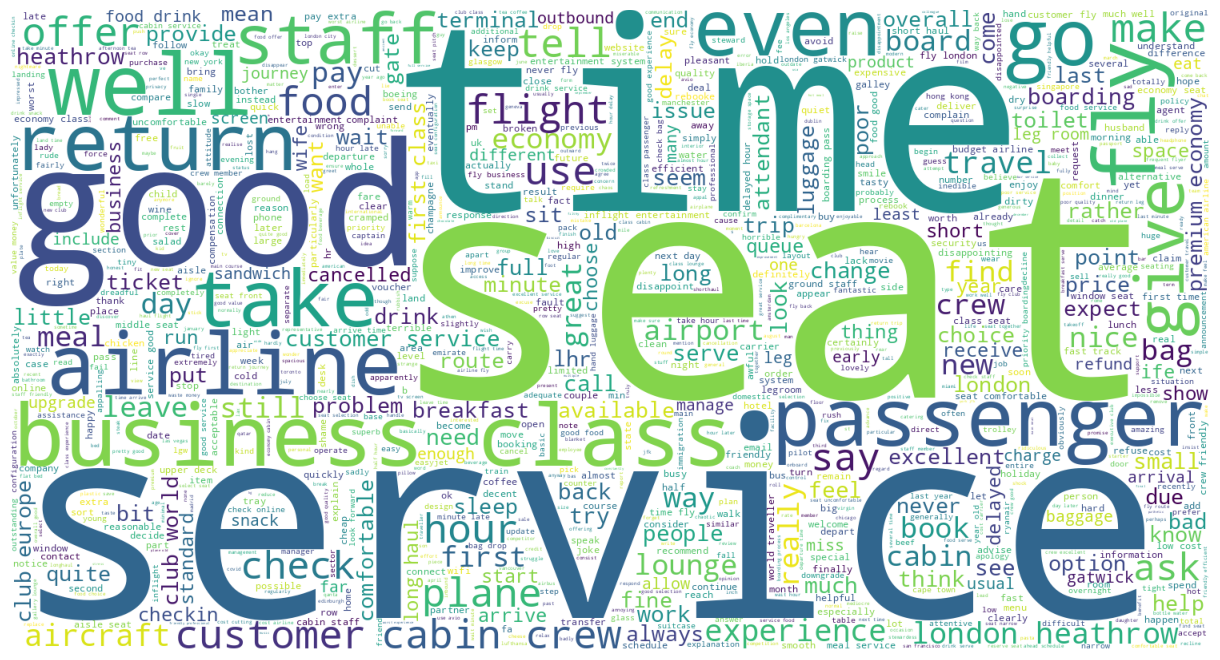

In [22]:
# join all the text data into a single string
text = " ".join(df['CleanRT'])

# generate the word cloud
wordcloud = WordCloud(max_words=1000, height= 800, width = 1500, background_color='white').generate(text)

# display the word cloud
plt.figure(figsize=(12, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [23]:
# Words Frequency of most common terms

words_list = []
for sentence in df['CleanRT']:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(30)

[('seat', 4926),
 ('not', 4831),
 ('service', 3256),
 ('no', 3079),
 ('fly', 2503),
 ('good', 2496),
 ('time', 2440),
 ('food', 2433),
 ('crew', 2359),
 ('get', 2291),
 ('london', 2181),
 ('cabin', 2121),
 ('customer', 1982),
 ('class', 1967),
 ('hour', 1912),
 ('airline', 1820),
 ('staff', 1674),
 ('business', 1613),
 ('do', 1548),
 ('heathrow', 1538),
 ('well', 1486),
 ('economy', 1462),
 ('passenger', 1312),
 ('first', 1305),
 ('check', 1294),
 ('go', 1293),
 ('take', 1285),
 ('return', 1284),
 ('make', 1233),
 ('experience', 1225)]

In [24]:
# Set color, max font size, and background color for better visibility
wordcloud = WordCloud(max_words=100, max_font_size=50, background_color='white')

fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # Adjust for the number of unique ratings
axes = axes.flatten()

for i, rating in enumerate(sorted(df['OverallRating'].dropna().unique())):
    text = ' '.join(df[df['OverallRating'] == rating]['CleanRT'].dropna())
    cloud = wordcloud.generate(text)
    axes[i].imshow(cloud, interpolation='bilinear')
    axes[i].set_title(f'Word Cloud for Rating {rating}', fontsize=18)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

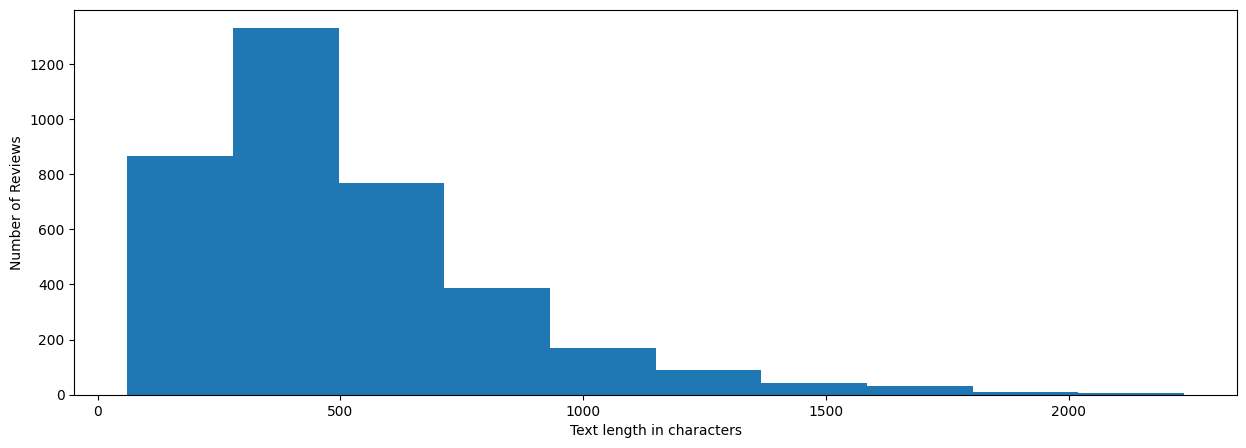

In [25]:
df['text_len'] = df['CleanRT'].str.len()

plt.figure(figsize=(15,5))
plt.hist(df['text_len'])
plt.xlabel('Text length in characters')
plt.ylabel('Number of Reviews')
plt.show()

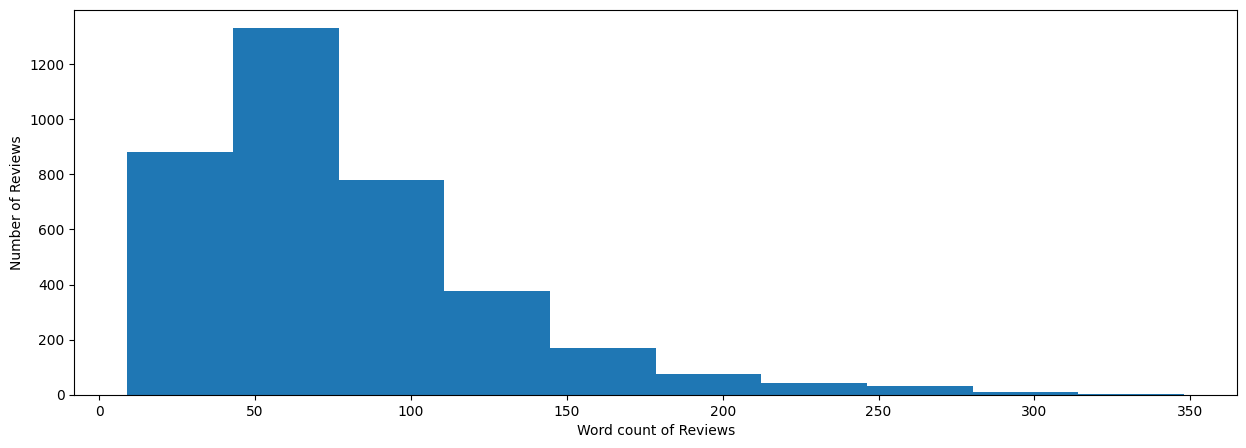

In [26]:
df['word_count'] = df['CleanRT'].str.split().map(lambda x:len(x))

plt.figure(figsize=(15,5))
plt.hist(df['word_count'])
plt.xlabel('Word count of Reviews')
plt.ylabel('Number of Reviews')
plt.show()

In [27]:
# Create N-Grams

def create_ngrams(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# Create bigrams and trigrams
df['unigrams'] = df['CleanRT'].apply(lambda x: x.split())
df['bigrams'] = df['unigrams'].apply(lambda x: create_ngrams(x, 2))
df['trigrams'] = df['unigrams'].apply(lambda x: create_ngrams(x, 3))
df.head(10)

ReviewHeader  \
0    Service level far worse then Ryanair   
1  do not upgrade members based on status   
2             Flight was smooth and quick   
3             Absolutely hopeless airline   
4        Customer Service is non existent   
5         I can’t imagine a worst airline   
6             sufficient leg and arm room   
7                      “crew were polite”   
8    Angry, disappointed, and unsatisfied   
9         BA now stands for Basic Airways   

                                          ReviewBody  OverallRating  \
0  4 Hours before takeoff we received a Mail stat...            1.0   
1  I recently had a delay on British Airways from...            3.0   
2  Boarded on time, but it took ages to get to th...            8.0   
3  5 days before the flight, we were advised by B...            1.0   
4  We traveled to Lisbon for our dream vacation, ...            1.0   
5  Booked a flight from Bucharest to Manchester w...            1.0   
6  Booked online months ago and the only hitch wa...            8.0   
7  The flight was on time. The crew were polite. ...            7.0   
8  Angry, disappointed, and unsatisfied. My route...            2.0   
9  As an infrequent flyer, British Airways was al...            3.0   

                                          ReviewText  \
0  Service level far worse then Ryanair 4 Hours b...   
1  do not upgrade members based on status I recen...   
2  Flight was smooth and quick Boarded on time, b...   
3  Absolutely hopeless airline 5 days before the ...   
4  Customer Service is non existent We traveled t...   
5  I can’t imagine a worst airline Booked a fligh...   
6  sufficient leg and arm room Booked online mont...   
7  “crew were polite” The flight was on time. The...   
8  Angry, disappointed, and unsatisfied Angry, di...   
9  BA now stands for Basic Airways As an infreque...   

                                             CleanRT  text_len  word_count  \
0  service level far bad ryanair hour takeoff rec...       427          66   
1  do not upgrade member base status recently del...       744         112   
2  smooth quick board time take age get runway du...       171          29   
3  absolutely hopeless airline day advise cancell...       679         109   
4  customer service existent travel lisbon dream ...       461          77   
5  imagine worst airline book bucharest mancheste...       617          92   
6  sufficient leg arm room book online month ago ...       534          84   
7  crew polite time crew polite story outward fin...       211          32   
8  angry disappointed unsatisfied angry disappoin...       473          67   
9  stand basic infrequent flyer always first choi...       647         102   

                                            unigrams  \
0  [service, level, far, bad, ryanair, hour, take...   
1  [do, not, upgrade, member, base, status, recen...   
2  [smooth, quick, board, time, take, age, get, r...   
3  [absolutely, hopeless, airline, day, advise, c...   
4  [customer, service, existent, travel, lisbon, ...   
5  [imagine, worst, airline, book, bucharest, man...   
6  [sufficient, leg, arm, room, book, online, mon...   
7  [crew, polite, time, crew, polite, story, outw...   
8  [angry, disappointed, unsatisfied, angry, disa...   
9  [stand, basic, infrequent, flyer, always, firs...   

                                             bigrams  \
0  [service level, level far, far bad, bad ryanai...   
1  [do not, not upgrade, upgrade member, member b...   
2  [smooth quick, quick board, board time, time t...   
3  [absolutely hopeless, hopeless airline, airlin...   
4  [customer service, service existent, existent ...   
5  [imagine worst, worst airline, airline book, b...   
6  [sufficient leg, leg arm, arm room, room book,...   
7  [crew polite, polite time, time crew, crew pol...   
8  [angry disappointed, disappointed unsatisfied,...   
9  [stand basic, basic infrequent, infrequent fly...   

                                         

Sentiment Analysis

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df['Sentiment'] = df['CleanRT'].apply(lambda text: sia.polarity_scores(text))
df['compound'] = df['Sentiment'].apply(lambda x: x['compound'])
df['neg'] = df['Sentiment'].apply(lambda x: x['neg'])
df['neu'] = df['Sentiment'].apply(lambda x: x['neu'])
df['pos'] = df['Sentiment'].apply(lambda x: x['pos'])

df.head()

ReviewHeader  \
0    Service level far worse then Ryanair   
1  do not upgrade members based on status   
2             Flight was smooth and quick   
3             Absolutely hopeless airline   
4        Customer Service is non existent   

                                          ReviewBody  OverallRating  \
0  4 Hours before takeoff we received a Mail stat...            1.0   
1  I recently had a delay on British Airways from...            3.0   
2  Boarded on time, but it took ages to get to th...            8.0   
3  5 days before the flight, we were advised by B...            1.0   
4  We traveled to Lisbon for our dream vacation, ...            1.0   

                                          ReviewText  \
0  Service level far worse then Ryanair 4 Hours b...   
1  do not upgrade members based on status I recen...   
2  Flight was smooth and quick Boarded on time, b...   
3  Absolutely hopeless airline 5 days before the ...   
4  Customer Service is non existent We traveled t...   

                                             CleanRT  text_len  word_count  \
0  service level far bad ryanair hour takeoff rec...       427          66   
1  do not upgrade member base status recently del...       744         112   
2  smooth quick board time take age get runway du...       171          29   
3  absolutely hopeless airline day advise cancell...       679         109   
4  customer service existent travel lisbon dream ...       461          77   

                                            unigrams  \
0  [service, level, far, bad, ryanair, hour, take...   
1  [do, not, upgrade, member, base, status, recen...   
2  [smooth, quick, board, time, take, age, get, r...   
3  [absolutely, hopeless, airline, day, advise, c...   
4  [customer, service, existent, travel, lisbon, ...   

                                             bigrams  \
0  [service level, level far, far bad, bad ryanai...   
1  [do not, not upgrade, upgrade member, member b...   
2  [smooth quick, quick board, board time, time t...   
3  [absolutely hopeless, hopeless airline, airlin...   
4  [customer service, service existent, existent ...   

                                            trigrams  \
0  [service level far, level far bad, far bad rya...   
1  [do not upgrade, not upgrade member, upgrade m...   
2  [smooth quick board, quick board time, board t...   
3  [absolutely hopeless airline, hopeless airline...   
4  [customer service existent, service existent t...   

                                           Sentiment  compound    neg    neu  \
0  {'neg': 0.273, 'neu': 0.622, 'pos': 0.105, 'co...   -0.9001  0.273  0.622   
1  {'neg': 0.221, 'neu': 0.678, 'pos': 0.1, 'comp...   -0.9149  0.221  0.678   
2  {'neg': 0.039, 'neu': 0.868, 'pos': 0.093, 'co...    0.4019  0.039  0.868   
3  {'neg': 0.174, 'neu': 0.698, 'pos': 0.127, 'co...   -0.6372  0.174  0.698   
4  {'neg': 0.028, 'neu': 0.847, 'pos': 0.125, 'co...    0.8020  0.028  0.847   

     pos  
0  0.105  
1  0.100  
2  0.093  
3  0.127  
4  0.125

In [29]:
df[['compound', 'neg', 'neu', 'pos']].describe()

compound          neg          neu          pos
count  3701.000000  3701.000000  3701.000000  3701.000000
mean      0.132167     0.142514     0.669352     0.188122
std       0.776448     0.092778     0.101068     0.125688
min      -0.995800     0.000000     0.248000     0.000000
25%      -0.741900     0.075000     0.606000     0.097000
50%       0.345600     0.133000     0.676000     0.159000
75%       0.926600     0.199000     0.737000     0.262000
max       0.998200     0.595000     1.000000     0.752000

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ReviewHeader   3701 non-null   object 
 1   ReviewBody     3701 non-null   object 
 2   OverallRating  3696 non-null   float64
 3   ReviewText     3701 non-null   object 
 4   CleanRT        3701 non-null   object 
 5   text_len       3701 non-null   int64  
 6   word_count     3701 non-null   int64  
 7   unigrams       3701 non-null   object 
 8   bigrams        3701 non-null   object 
 9   trigrams       3701 non-null   object 
 10  Sentiment      3701 non-null   object 
 11  compound       3701 non-null   float64
 12  neg            3701 non-null   float64
 13  neu            3701 non-null   float64
 14  pos            3701 non-null   float64
dtypes: float64(5), int64(2), object(8)
memory usage: 433.8+ KB


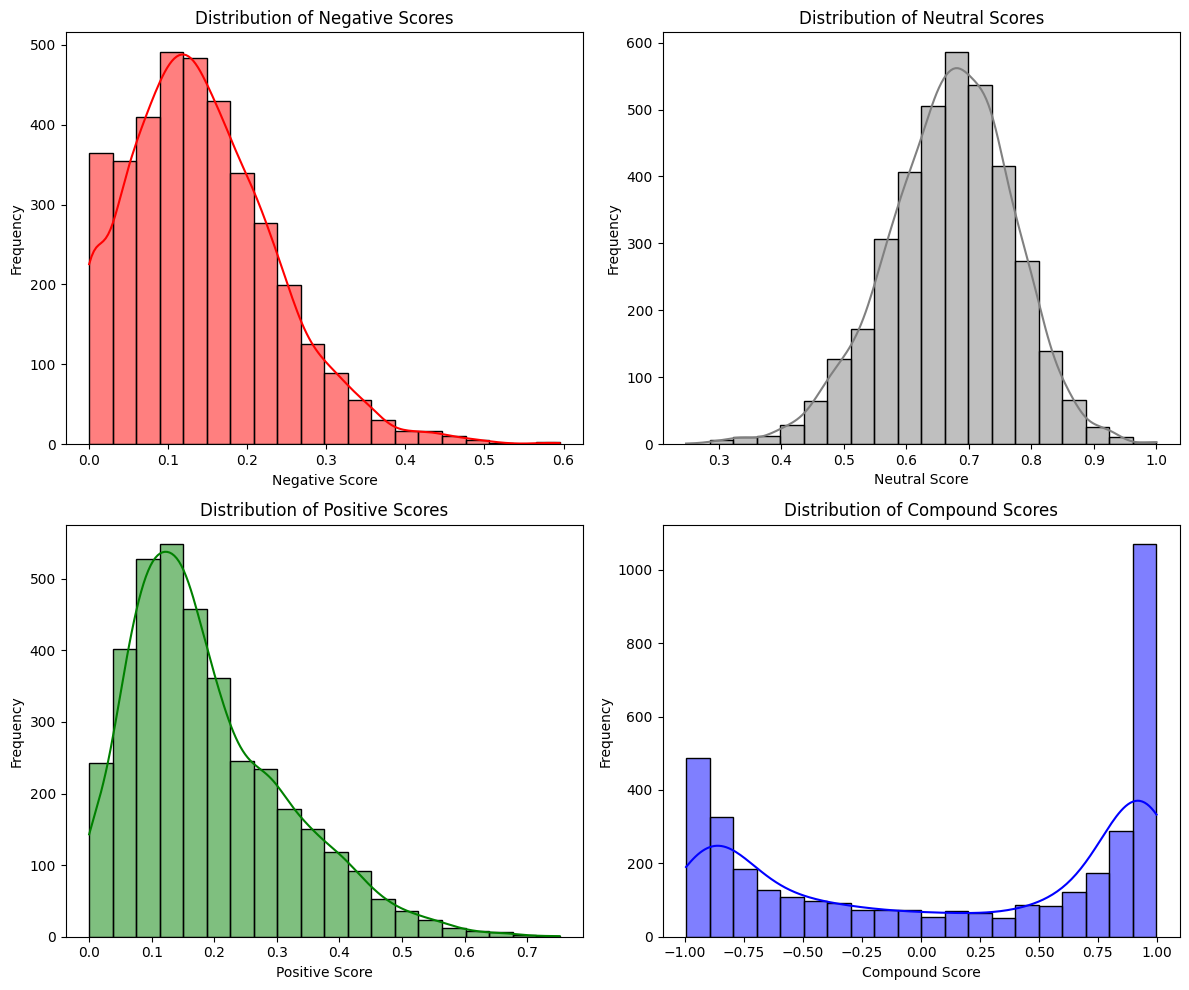

In [31]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Extracting neg, neu, pos, and compound scores
df['neg'] = df['Sentiment'].apply(lambda x: x['neg'])
df['neu'] = df['Sentiment'].apply(lambda x: x['neu'])
df['pos'] = df['Sentiment'].apply(lambda x: x['pos'])

# Negative scores
sns.histplot(df['neg'], bins=20, color='red', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Negative Scores')
axes[0, 0].set_xlabel('Negative Score')
axes[0, 0].set_ylabel('Frequency')

# Neutral scores
sns.histplot(df['neu'], bins=20, color='gray', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Neutral Scores')
axes[0, 1].set_xlabel('Neutral Score')
axes[0, 1].set_ylabel('Frequency')

# Positive scores
sns.histplot(df['pos'], bins=20, color='green', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Positive Scores')
axes[1, 0].set_xlabel('Positive Score')
axes[1, 0].set_ylabel('Frequency')

# Compound scores
sns.histplot(df['compound'], bins=20, color='blue', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Compound Scores')
axes[1, 1].set_xlabel('Compound Score')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-32-abedb6d0357d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverallRating', y='compound', data=avg_sentiment, palette='viridis')


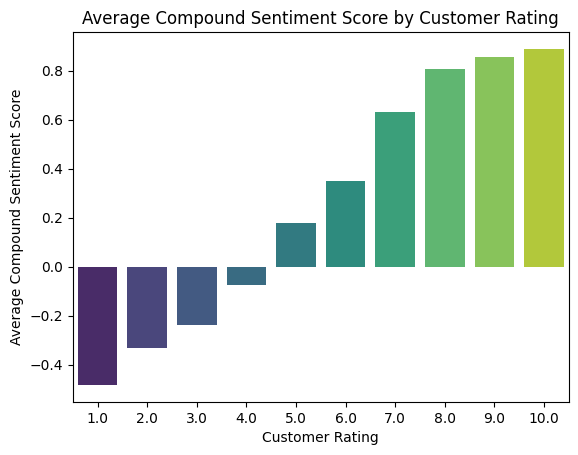

In [32]:
# Calculate the average sentiment for each rating
avg_sentiment = df.groupby('OverallRating')['compound'].mean().reset_index()

# Create a bar plot
sns.barplot(x='OverallRating', y='compound', data=avg_sentiment, palette='viridis')

# Add titles and labels
plt.title('Average Compound Sentiment Score by Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Average Compound Sentiment Score')
plt.show()

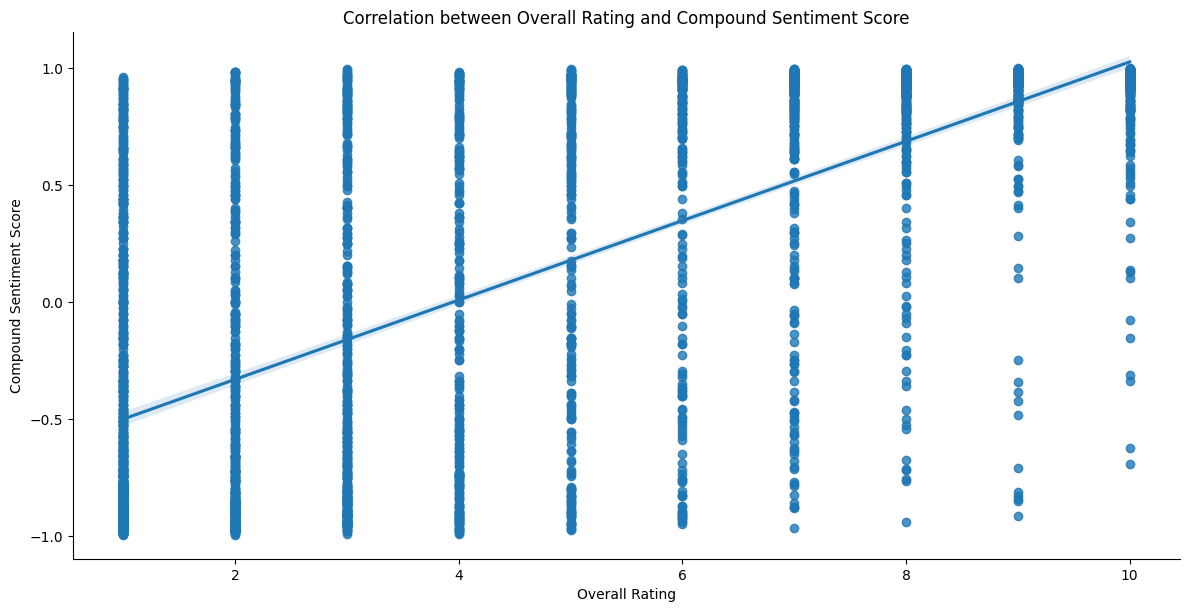

In [33]:
df['OverallRating'] = df['OverallRating'].astype(float)
df['compound'] = df['Sentiment'].apply(lambda x: x['compound'])

# Create a scatter plot with a regression line
sns.lmplot(x='OverallRating', y='compound', data=df, aspect=2, height=6)
plt.title('Correlation between Overall Rating and Compound Sentiment Score')
plt.xlabel('Overall Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()

In [34]:
def display_wordcloud(sentiment_data, sentiment_type):
    text = " ".join(sentiment_data)
    wordcloud = WordCloud(max_words=500, height=800, width=1500, background_color='white').generate(text)

    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud)
    plt.title(f"{sentiment_type} Sentiment Word Cloud")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Filtering the DataFrame for each sentiment type
neg_texts = df[df['neg'] > 0.5]['CleanRT']
neu_texts = df[df['neu'] > 0.5]['CleanRT']
pos_texts = df[df['pos'] > 0.5]['CleanRT']

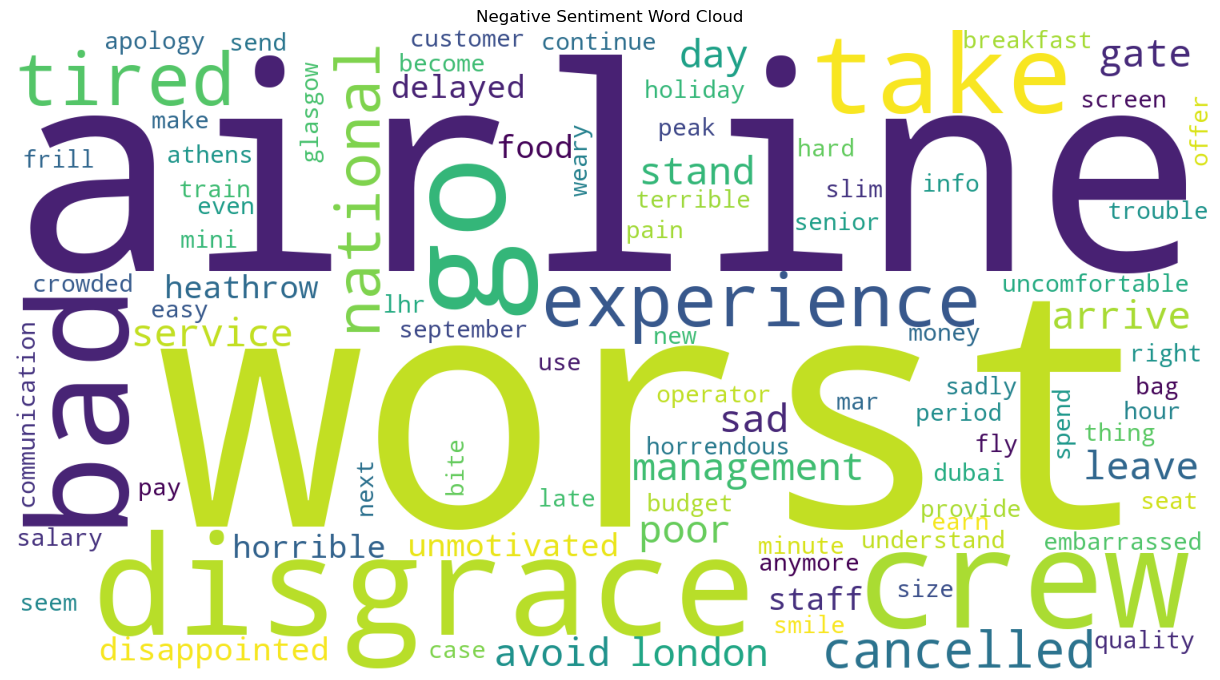

In [ ]:
# Display word clouds for each sentiment
display_wordcloud(neg_texts, "Negative")

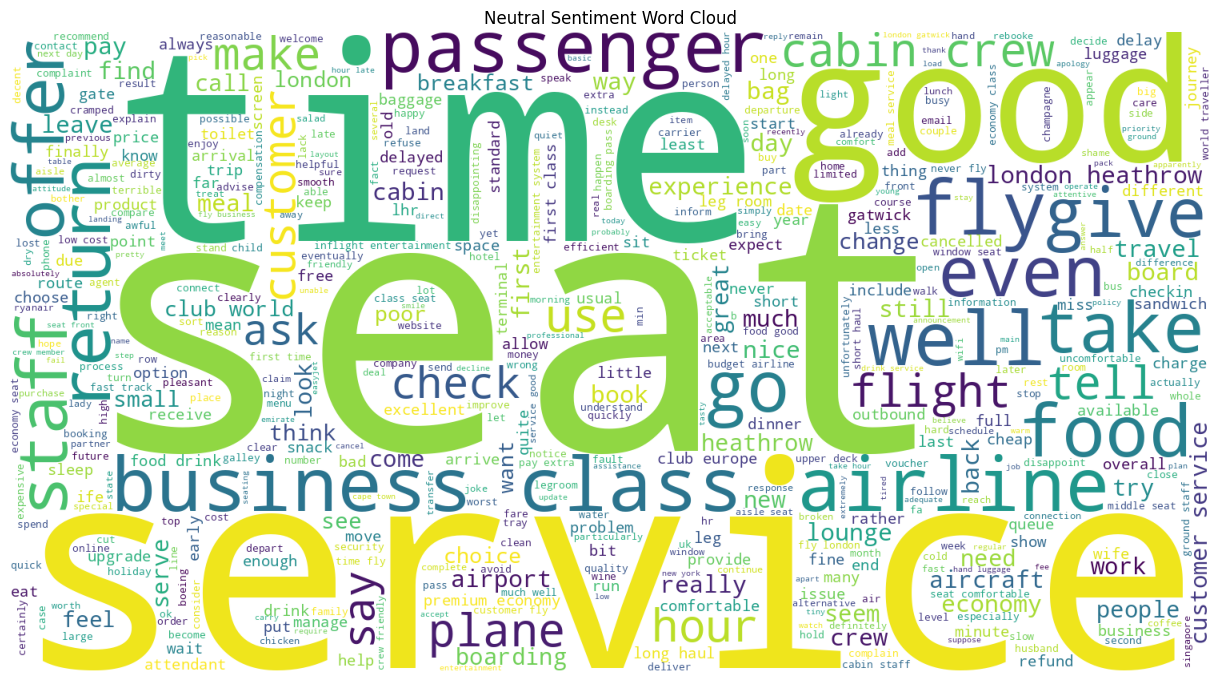

In [35]:
display_wordcloud(neu_texts, "Neutral")

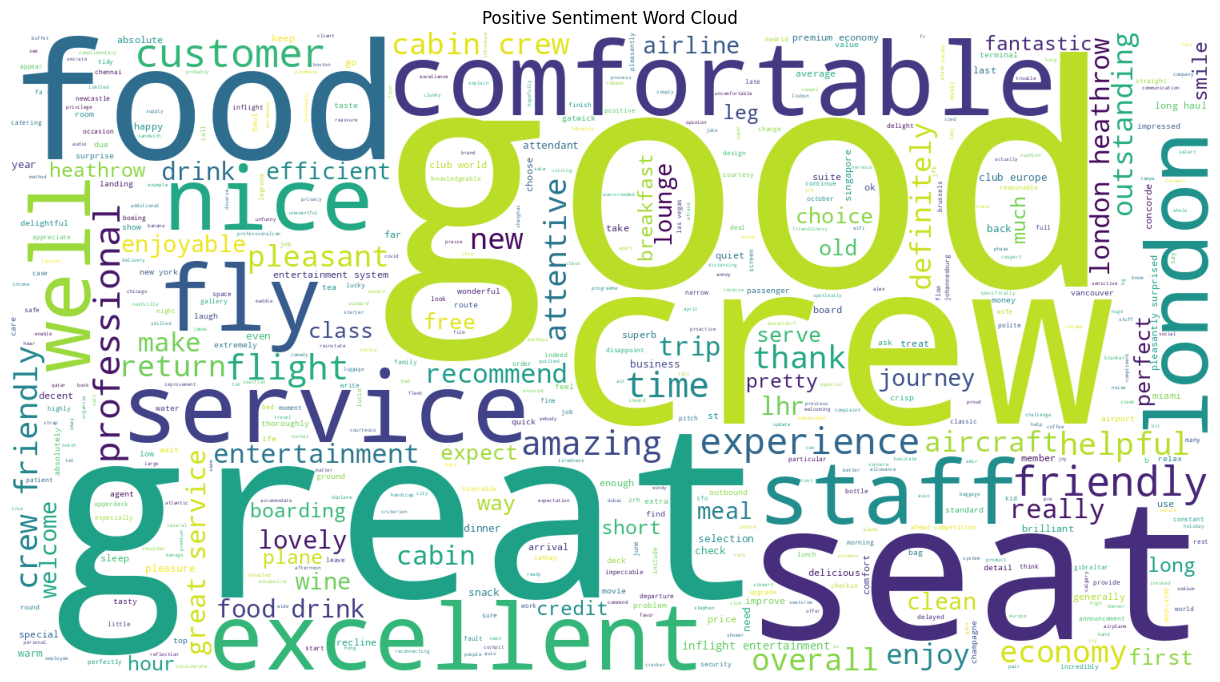

In [36]:
display_wordcloud(pos_texts, "Positive")

Classification

In [37]:
# Function to classify sentiment based on the compound score

def classify_sentiment(row):
    compound = row['compound']
    if compound > 0.3:
        return 'positive'
    elif compound < -0.2:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment_Label'] = df.apply(classify_sentiment, axis=1)

df.head()

ReviewHeader  \
0    Service level far worse then Ryanair   
1  do not upgrade members based on status   
2             Flight was smooth and quick   
3             Absolutely hopeless airline   
4        Customer Service is non existent   

                                          ReviewBody  OverallRating  \
0  4 Hours before takeoff we received a Mail stat...            1.0   
1  I recently had a delay on British Airways from...            3.0   
2  Boarded on time, but it took ages to get to th...            8.0   
3  5 days before the flight, we were advised by B...            1.0   
4  We traveled to Lisbon for our dream vacation, ...            1.0   

                                          ReviewText  \
0  Service level far worse then Ryanair 4 Hours b...   
1  do not upgrade members based on status I recen...   
2  Flight was smooth and quick Boarded on time, b...   
3  Absolutely hopeless airline 5 days before the ...   
4  Customer Service is non existent We traveled t...   

                                             CleanRT  text_len  word_count  \
0  service level far bad ryanair hour takeoff rec...       427          66   
1  do not upgrade member base status recently del...       744         112   
2  smooth quick board time take age get runway du...       171          29   
3  absolutely hopeless airline day advise cancell...       679         109   
4  customer service existent travel lisbon dream ...       461          77   

                                            unigrams  \
0  [service, level, far, bad, ryanair, hour, take...   
1  [do, not, upgrade, member, base, status, recen...   
2  [smooth, quick, board, time, take, age, get, r...   
3  [absolutely, hopeless, airline, day, advise, c...   
4  [customer, service, existent, travel, lisbon, ...   

                                             bigrams  \
0  [service level, level far, far bad, bad ryanai...   
1  [do not, not upgrade, upgrade member, member b...   
2  [smooth quick, quick board, board time, time t...   
3  [absolutely hopeless, hopeless airline, airlin...   
4  [customer service, service existent, existent ...   

                                            trigrams  \
0  [service level far, level far bad, far bad rya...   
1  [do not upgrade, not upgrade member, upgrade m...   
2  [smooth quick board, quick board time, board t...   
3  [absolutely hopeless airline, hopeless airline...   
4  [customer service existent, service existent t...   

                                           Sentiment  compound    neg    neu  \
0  {'neg': 0.273, 'neu': 0.622, 'pos': 0.105, 'co...   -0.9001  0.273  0.622   
1  {'neg': 0.221, 'neu': 0.678, 'pos': 0.1, 'comp...   -0.9149  0.221  0.678   
2  {'neg': 0.039, 'neu': 0.868, 'pos': 0.093, 'co...    0.4019  0.039  0.868   
3  {'neg': 0.174, 'neu': 0.698, 'pos': 0.127, 'co...   -0.6372  0.174  0.698   
4  {'neg': 0.028, 'neu': 0.847, 'pos': 0.125, 'co...    0.8020  0.028  0.847   

     pos Sentiment_Label  
0  0.105        negative  
1  0.100        negative  
2  0.093        positive  
3  0.127        negative  
4  0.125        positive

In [38]:
df['Sentiment_Label'].value_counts()

Sentiment_Label
positive    1875
negative    1492
neutral      334
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Text vectorization with TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['CleanRT'])

In [40]:
# Labels
y = df['Sentiment_Label']

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Model training
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [43]:
# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.74      0.71      0.72       296
     neutral       0.00      0.00      0.00        76
    positive       0.72      0.89      0.79       369

    accuracy                           0.73       741
   macro avg       0.49      0.53      0.51       741
weighted avg       0.65      0.73      0.68       741



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
